In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
raw_csv_data = pd.read_csv('tracks.csv')
raw_csv_data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [3]:
df = raw_csv_data.copy()
df.info()
#Missing values (name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

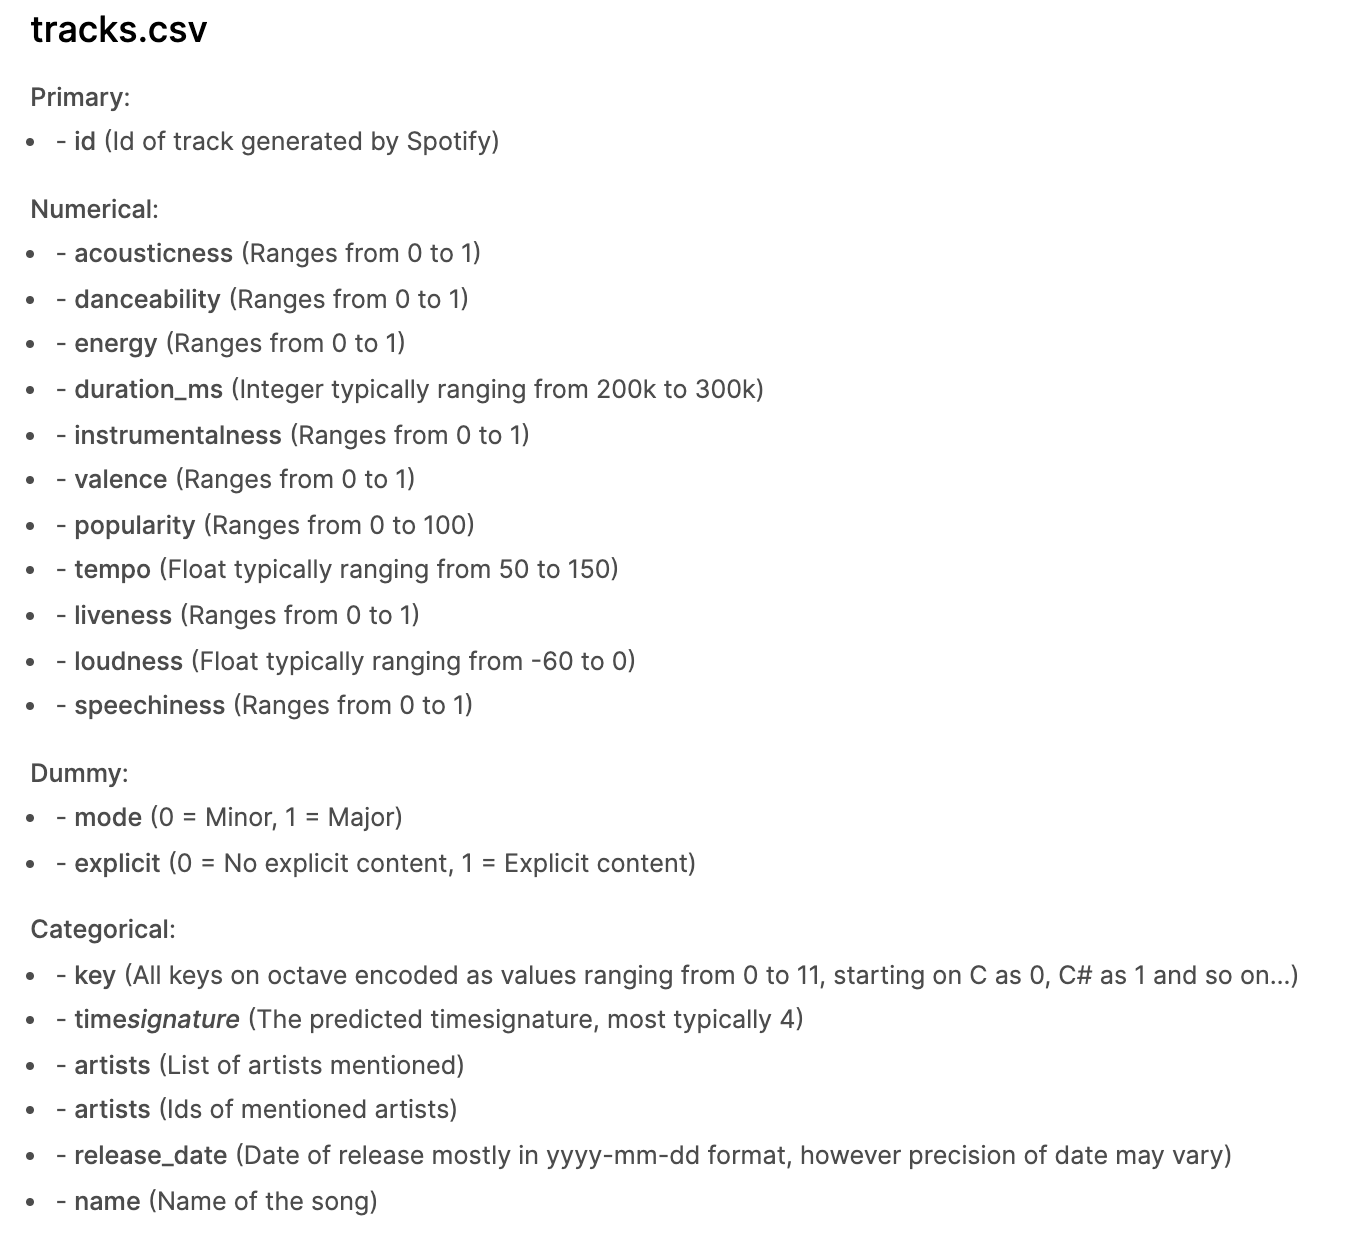

In [4]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
#id, id_artists variable does not help with our analysis. Therefore I will drop ID
df = df.drop(['id', 'id_artists'], axis=1)
df

,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,50,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,blind,72,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,What They'll Say About Us,70,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [6]:
df.columns

Index(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

### Name

In [7]:
#Name has missing values
df = df.dropna(axis=0, subset = ['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586601 non-null  int64  
 2   duration_ms       586601 non-null  int64  
 3   explicit          586601 non-null  int64  
 4   artists           586601 non-null  object 
 5   release_date      586601 non-null  object 
 6   danceability      586601 non-null  float64
 7   energy            586601 non-null  float64
 8   key               586601 non-null  int64  
 9   loudness          586601 non-null  float64
 10  mode              586601 non-null  int64  
 11  speechiness       586601 non-null  float64
 12  acousticness      586601 non-null  float64
 13  instrumentalness  586601 non-null  float64
 14  liveness          586601 non-null  float64
 15  valence           586601 non-null  float64
 16  tempo             58

### Popularity

In [8]:
#THis is the dependent variable and has to be moved to the end. Let us also sort it based on popularity
df.columns.values

array(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'], dtype=object)

In [9]:
column_names_reordered = ['name', 'duration_ms', 'explicit', 'artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
df = df[column_names_reordered]
df.head()

,name,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,Carve,126903,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,6
1,Capítulo 2.16 - Banquero Anarquista,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0
2,Vivo para Quererte - Remasterizado,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,0
3,El Prisionero - Remasterizado,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,0
4,Lady of the Evening,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,0


In [10]:
df=df.sort_values('popularity', ascending=False)
df.head()

,name,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,100
93803,drivers license,242014,1,['Olivia Rodrigo'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,99
93804,Astronaut In The Ocean,132780,0,['Masked Wolf'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,98
92811,telepatía,160191,0,['Kali Uchis'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,97
92810,Save Your Tears,215627,1,['The Weeknd'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,97


### Duration ms

In [11]:
#It will be better if we have duration in minutes
df['duration_m']=df['duration_ms'].apply(lambda x : x/60000)
df.drop('duration_ms', inplace=True, axis=1)


In [12]:
df.columns.values

array(['name', 'explicit', 'artists', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'popularity', 'duration_m'], dtype=object)

In [13]:
column_names_reordered = ['name', 'duration_m', 'explicit', 'artists', 'release_date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'popularity']
df = df[column_names_reordered]
df.head()

,name,duration_m,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),3.301367,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,100
93803,drivers license,4.033567,1,['Olivia Rodrigo'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,99
93804,Astronaut In The Ocean,2.213000,0,['Masked Wolf'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,98
92811,telepatía,2.669850,0,['Kali Uchis'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,97
92810,Save Your Tears,3.593783,1,['The Weeknd'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,97


In [14]:
df

,name,duration_m,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),3.301367,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.6960,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,100
93803,drivers license,4.033567,1,['Olivia Rodrigo'],2021-01-08,0.585,0.4360,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,99
93804,Astronaut In The Ocean,2.213000,0,['Masked Wolf'],2021-01-06,0.778,0.6950,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,98
92811,telepatía,2.669850,0,['Kali Uchis'],2020-12-04,0.653,0.5240,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,97
92810,Save Your Tears,3.593783,1,['The Weeknd'],2020-03-20,0.680,0.8260,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511196,Chale Kyon Na Meri Naiya,3.108767,0,['Bashir Qawal'],1937-12-31,0.325,0.2080,8,-9.982,1,0.0613,0.9900,0.000043,0.189,0.573,73.206,4,0
511195,Sansar Ho Prem Ka Mandir,3.342000,0,['Bibbo'],1937-12-31,0.345,0.2160,5,-10.867,0,0.0532,0.9870,0.185000,0.257,0.425,75.866,3,0
315090,"Brennið þið, vitar",4.318133,0,"['Páll Ísólfsson', 'Karlakórinn Fóstbræður', '...",1969-01-01,0.169,0.1570,0,-19.506,1,0.0348,0.9690,0.266000,0.672,0.150,98.543,4,0
315087,Morgunn í maí,2.337483,0,['Guðmundur Jónsson'],1969-01-01,0.477,0.6370,0,-11.993,0,0.0482,0.4050,0.000000,0.149,0.854,132.390,4,0


### Artists

In [15]:
#Do i have to convert this to dummy. There will be too many

### release_date

In [16]:
type(df['release_date'][0])
#This is of type string. Let us convert it to timestamp

str

In [17]:
df['release_date'] = pd.to_datetime(df['release_date'], format = '%Y-%m-%d')
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
#Should I convert it to 3 seperate columns

In [19]:
import seaborn as sns
sns.set()

<AxesSubplot:>

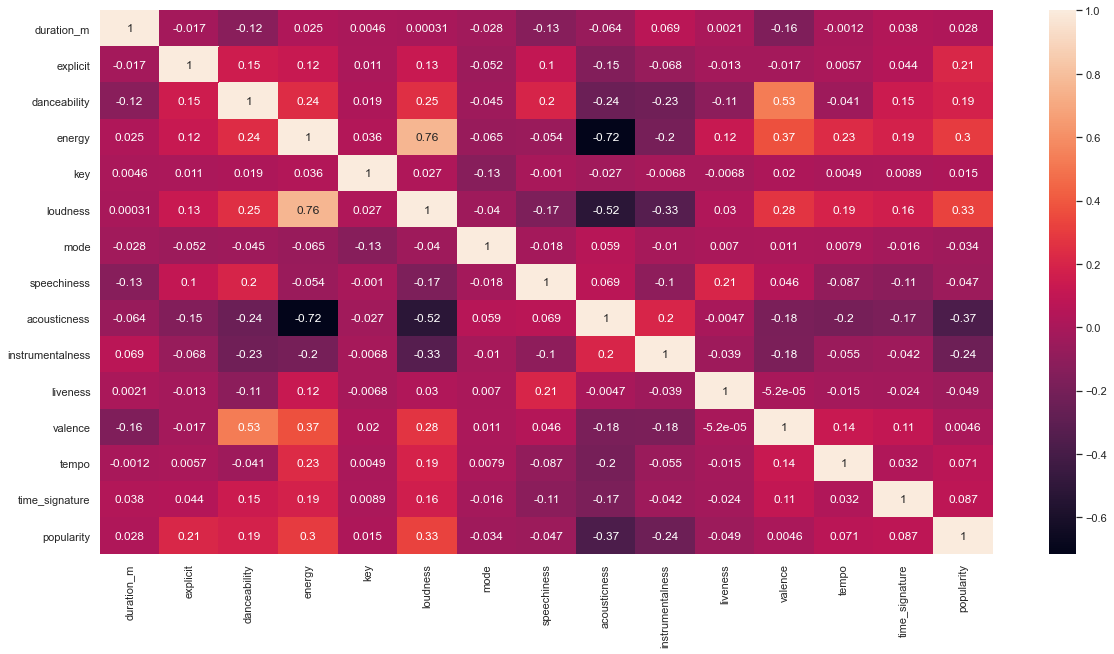

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)
#Note: energy and loudness have high correlation
#Valence and dancability

### Data Preprocessing

In [43]:
df.head()

,name,duration_m,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),3.301367,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,100
93803,drivers license,4.033567,1,['Olivia Rodrigo'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,99
93804,Astronaut In The Ocean,2.213000,0,['Masked Wolf'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,98
92811,telepatía,2.669850,0,['Kali Uchis'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,97
92810,Save Your Tears,3.593783,1,['The Weeknd'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,97


In [44]:
df_preprocessed = df.copy()
df_preprocessed.describe()

,duration_m,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,3.834248,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930,3.873410,27.573212
std,2.108880,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942,0.473112,18.369417
min,0.055733,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.918050,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000,4.000000,13.000000
50%,3.581783,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000,4.000000,27.000000
75%,4.397783,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000,4.000000,41.000000
max,93.686967,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,100.000000


In [45]:
#T0 make the dataset smaller, I have taken only those songs from 2015
mask = df_preprocessed['release_date']>'2015-1-1'
df_preprocessed_2015 = df_preprocessed.loc[mask]

In [46]:
df_preprocessed_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74070 entries, 93802 to 81772
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              74070 non-null  object        
 1   duration_m        74070 non-null  float64       
 2   explicit          74070 non-null  int64         
 3   artists           74070 non-null  object        
 4   release_date      74070 non-null  datetime64[ns]
 5   danceability      74070 non-null  float64       
 6   energy            74070 non-null  float64       
 7   key               74070 non-null  int64         
 8   loudness          74070 non-null  float64       
 9   mode              74070 non-null  int64         
 10  speechiness       74070 non-null  float64       
 11  acousticness      74070 non-null  float64       
 12  instrumentalness  74070 non-null  float64       
 13  liveness          74070 non-null  float64       
 14  valence           

In [47]:
# df_preprocessed_2015 = df_preprocessed_2015.drop(['name', 'artists', 'release_date'], axis=1)
# df_preprocessed_2015.shape

### Encoding Categorical Variables

In [48]:
#The categorical variables are key and time signature
len(df_preprocessed_2015['key'].unique())

12

In [49]:
len(df_preprocessed_2015['time_signature'].unique())

5

In [50]:
df_preprocessed_2015 = pd.get_dummies(df_preprocessed_2015, columns=['key' , 'time_signature'], drop_first = True)
df_preprocessed_2015

,name,duration_m,explicit,artists,release_date,danceability,energy,loudness,mode,speechiness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
93802,Peaches (feat. Daniel Caesar & Giveon),3.301367,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.696,-6.181,1,0.1190,...,0,0,0,0,0,0,0,0,1,0
93803,drivers license,4.033567,1,['Olivia Rodrigo'],2021-01-08,0.585,0.436,-8.761,1,0.0601,...,0,0,0,0,1,0,0,0,1,0
93804,Astronaut In The Ocean,2.213000,0,['Masked Wolf'],2021-01-06,0.778,0.695,-6.865,0,0.0913,...,0,0,0,0,0,0,0,0,1,0
92811,telepatía,2.669850,0,['Kali Uchis'],2020-12-04,0.653,0.524,-9.016,0,0.0502,...,0,0,0,0,0,1,0,0,1,0
92810,Save Your Tears,3.593783,1,['The Weeknd'],2020-03-20,0.680,0.826,-5.487,1,0.0309,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425261,2000 Light Years from Home - Remastered,7.566667,0,['Cary Grace'],2018-03-13,0.288,0.357,-17.003,0,0.0488,...,0,0,0,0,0,0,0,0,1,0
81776,Year 2008 - Fernando Ferreyra Remix,10.252617,0,"['Suffused', 'Fernando Ferreyra']",2019-07-17,0.635,0.534,-10.480,1,0.0548,...,0,0,0,0,0,0,0,0,1,0
425269,"From Petra to Istanbul, 2000 Years",3.634317,0,['Diodo'],2020-08-30,0.302,0.406,-12.047,1,0.0330,...,0,0,0,0,0,0,0,0,1,0
425271,On the Road for 2000 Years,2.438800,0,"['Tony Diana', 'Anthony Armondo']",2018-08-24,0.218,0.515,-12.292,0,0.0395,...,0,0,0,1,0,0,0,0,1,0


In [51]:
df_preprocessed_2015.shape

(74070, 31)

In [52]:
df_preprocessed_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74070 entries, 93802 to 81772
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              74070 non-null  object        
 1   duration_m        74070 non-null  float64       
 2   explicit          74070 non-null  int64         
 3   artists           74070 non-null  object        
 4   release_date      74070 non-null  datetime64[ns]
 5   danceability      74070 non-null  float64       
 6   energy            74070 non-null  float64       
 7   loudness          74070 non-null  float64       
 8   mode              74070 non-null  int64         
 9   speechiness       74070 non-null  float64       
 10  acousticness      74070 non-null  float64       
 11  instrumentalness  74070 non-null  float64       
 12  liveness          74070 non-null  float64       
 13  valence           74070 non-null  float64       
 14  tempo             

In [53]:
df_preprocessed_2015.columns.values

array(['name', 'duration_m', 'explicit', 'artists', 'release_date',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'popularity', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5'],
      dtype=object)

In [54]:
column_names_reordered = ['name', 'duration_m', 'explicit', 'artists', 'release_date',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'popularity']

In [55]:
df_preprocessed_2015 = df_preprocessed_2015[column_names_reordered]
df_preprocessed_2015.head()

,name,duration_m,explicit,artists,release_date,danceability,energy,loudness,mode,speechiness,...,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),3.301367,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']",2021-03-19,0.677,0.696,-6.181,1,0.1190,...,0,0,0,0,0,0,0,1,0,100
93803,drivers license,4.033567,1,['Olivia Rodrigo'],2021-01-08,0.585,0.436,-8.761,1,0.0601,...,0,0,0,1,0,0,0,1,0,99
93804,Astronaut In The Ocean,2.213000,0,['Masked Wolf'],2021-01-06,0.778,0.695,-6.865,0,0.0913,...,0,0,0,0,0,0,0,1,0,98
92811,telepatía,2.669850,0,['Kali Uchis'],2020-12-04,0.653,0.524,-9.016,0,0.0502,...,0,0,0,0,1,0,0,1,0,97
92810,Save Your Tears,3.593783,1,['The Weeknd'],2020-03-20,0.680,0.826,-5.487,1,0.0309,...,0,0,0,0,0,0,0,1,0,97


In [56]:
df_preprocessed_2015.to_csv('Tracks_Preprocessed_2015.csv', index=False)